In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
wine = pd.read_csv('datasets/wine/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [104]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [105]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


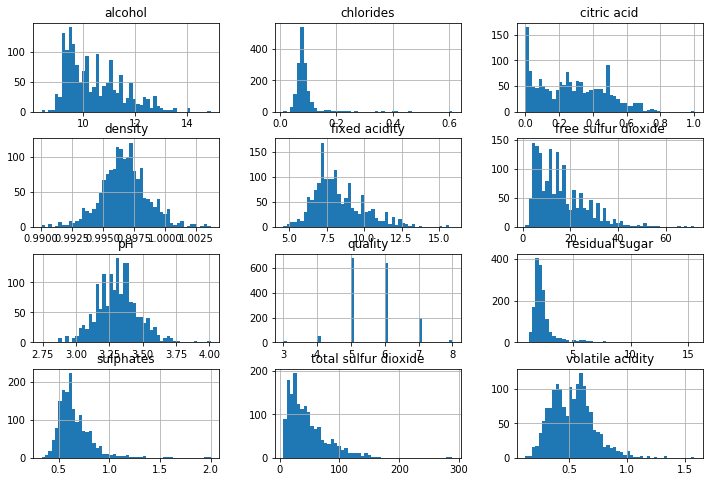

In [106]:
wine.hist(bins=50, figsize=(12, 8))
plt.show()

In [107]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(wine, wine['quality']):
    strat_train_set = wine.loc[train_index]
    strat_test_set = wine.loc[test_index]

In [108]:
wine = strat_train_set.copy()
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5
344,11.9,0.570,0.50,2.6,0.082,6.0,32.0,1.00060,3.12,0.78,10.70,6
924,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.20,5
971,10.4,0.260,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.90,6


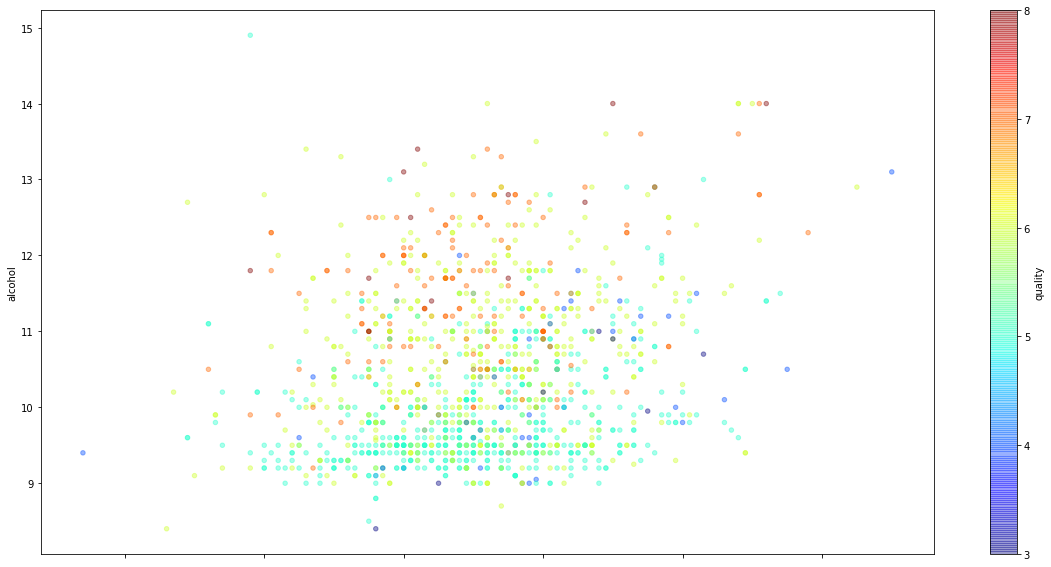

In [109]:
wine.plot(kind='scatter', x='pH', y='alcohol', s=20, c='quality', cmap=plt.get_cmap('jet'), alpha=0.4,
         figsize=(20, 10))
plt.show()

In [110]:
corr_matrix = wine.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.481197
sulphates               0.228050
citric acid             0.210802
fixed acidity           0.107940
residual sugar          0.003710
free sulfur dioxide    -0.048291
pH                     -0.052063
chlorides              -0.120231
density                -0.193009
total sulfur dioxide   -0.194511
volatile acidity       -0.383249
Name: quality, dtype: float64

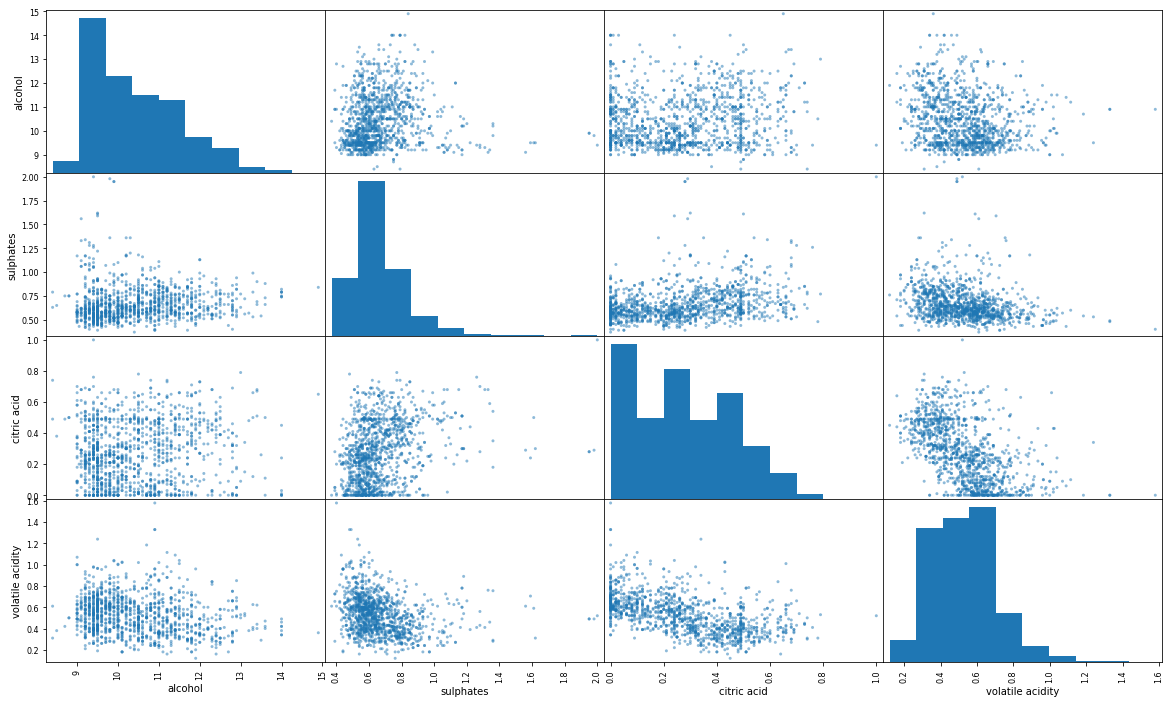

In [111]:
from pandas.plotting import scatter_matrix

categories = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity']

scatter_matrix(wine[categories], figsize=(20, 12))
plt.show()

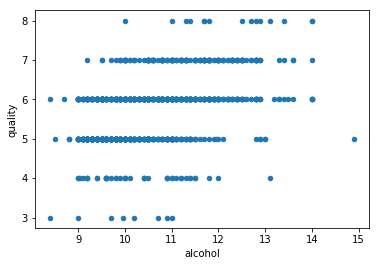

In [112]:
wine.plot(kind='scatter', x='alcohol', y='quality')

In [113]:
wine = strat_train_set.drop('quality', axis=1)
wine_labels = strat_train_set['quality']

In [114]:
#Let's make a fast test
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine, wine_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
def get_rmse(predictions, labels):
    lin_mse = mean_squared_error(predictions, labels)
    lin_rmse = np.sqrt(lin_mse)
    return lin_rmse

In [128]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(wine, wine_labels)

wine_predictions = forest_clf.predict(wine)

In [131]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(wine, wine_labels):
    clone_clf = clone(forest_clf)
    X_train_folds = wine.iloc[train_index]
    y_train_folds = (wine_labels.iloc[train_index])
    X_test_fold = wine.iloc[test_index]
    y_test_fold = (wine_labels.iloc[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.6440281030444965
0.6557377049180327
0.6141176470588235


In [132]:
from sklearn.metrics import mean_squared_error

wine_predictions = forest_clf.predict(wine)
get_rmse(wine_predictions, wine_labels)

0.12504885675386868

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine, wine_labels)
wine_predictions = tree_reg.predict(wine)
get_rmse(wine_predictions, wine_labels)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(wine, wine_labels)
wine_predictions = forest_reg.predict(wine)
get_rmse(wine_predictions, wine_labels)

In [ ]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score

def get_scores_rmse(model, X, y):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv = 10)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores

In [ ]:
display_scores(get_scores_rmse(lin_reg, wine, wine_labels))

In [ ]:
display_scores(get_scores_rmse(tree_reg, wine, wine_labels))

In [ ]:
display_scores(get_scores_rmse(forest_reg, wine, wine_labels))

In [133]:
display_scores(get_scores_rmse(forest_clf, wine, wine_labels))

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Scores:  [0.60128068 0.78446454 0.7152817  0.61631563 0.66472586 0.63988188
 0.70988521 0.69304759 0.62994079 0.68702256]
Mean:  0.6741846439467307
Standard deviation:  0.05247213846183545


In [135]:
# Search for the best hyperparametes
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(wine, wine_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'bootstrap': [False], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [136]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_estimator_.feature_importances_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
{'n_estimators': 50, 'max_features': 6}
[0.06892134 0.10361218 0.06358469 0.07697743 0.07863495 0.05979517
 0.10352758 0.08105415 0.07520603 0.11424683 0.17443964]


In [137]:
final_model = grid_search.best_estimator_

In [138]:
X_test = strat_test_set.drop('quality', axis=1)
y_test = strat_test_set['quality'].copy()

In [139]:
final_model.predict(X_test)
display_scores(get_scores_rmse(final_model, wine, wine_labels))

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Scores:  [0.65633012 0.73379939 0.68199434 0.62257281 0.63490218 0.5681854
 0.6580812  0.69870521 0.61075025 0.68702256]
Mean:  0.6552343459965917
Standard deviation:  0.04564493639844218
